In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/PythonProject/Triplet Loss Model

/content/drive/MyDrive/PythonProject/Triplet Loss Model


In [ ]:
import cv2
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
with open("datasets/vn-celeb-dataset-rgb-450-people.p", "rb") as f:
    images = pickle.load(f)
    labels = pickle.load(f)

In [ ]:
labels

array([  0,   0,   0, ..., 450, 450, 450], dtype=int32)

In [ ]:
images.shape

(15490, 180, 180, 3)

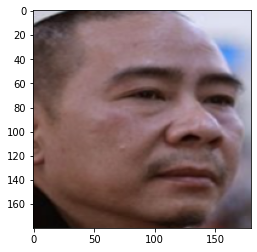

In [ ]:

img = images[35]
plt.imshow(img)

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.2, random_state = 42)

In [ ]:
# # One Hot Vector Label
# from sklearn.preprocessing import LabelBinarizer

# lb = LabelBinarizer()
# trainLabelOH = lb.fit_transform(Y_train)
# validLabelOH = lb.fit_transform(Y_test)

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Lambda, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import MaxPooling2D

def face_regconition_net():
    model = VGG16(include_top = False, weights= None, input_shape = (180, 180, 3))
    pool = MaxPooling2D(pool_size=(2, 2))(model.layers[-4].output)
    flatten = Flatten()(pool)
    dense = Dense(128, activation = 'relu')(flatten)
    norm2 = Lambda(lambda x: tf.math.l2_normalize(x, axis = 1))(dense)
    model = Model(inputs = [model.input], outputs = [norm2])
    return model

model = face_regconition_net()
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

In [2]:
def face_regconition_net():
    model = VGG16(include_top = False, weights= None, input_shape = (180, 180, 3))
    
    return model

model = face_regconition_net()
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

In [ ]:
[1,2,3,4,5]

In [ ]:
model = VGG16(include_top=False)
pool = MaxPooling2D(pool_size=(2, 2))(model.layers[-4].output)
model = Model(inputs = [model.input], outputs = [pool])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [ ]:
!pip install tensorflow_addons

     |████████████████████████████████| 706kB 20.5MB/s 


In [ ]:
import tensorflow_addons as tfa

model.compile(
    optimizer=SGD(lr=0.001, momentum=0.9, nesterov=True),
    loss=tfa.losses.TripletSemiHardLoss())

In [ ]:
from keras.models import load_model

print("Loading pre-trained weight")
model.load_weights('Models/triplet_weight_rgb_450_face_root_semi_hard_triplet.hdf5')

Loading pre-trained weight


In [ ]:
from keras.callbacks import ModelCheckpoint

filepath = 'Models/triplet_weight_rgb_450_face_root_semi_hard_triplet.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_weights_only=True, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
callbacks_list

In [ ]:
batch_size = 48

In [ ]:
gen_train = tf.data.Dataset.from_tensor_slices((images, labels)).repeat().shuffle(1024).batch(batch_size)
gen_train

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.uint8, tf.int32)>

In [ ]:
history = model.fit(
    gen_train,
    steps_per_epoch = len(images) // batch_size,
    epochs=50,
    callbacks = callbacks_list)

Epoch 1/50
322/322 [==============================] - 168s 386ms/step - loss: 0.6597

Epoch 00001: loss improved from inf to 0.66921, saving model to Models/triplet_weight_rgb_450_face_root_semi_hard_triplet.hdf5
Epoch 2/50
322/322 [==============================] - 125s 389ms/step - loss: 0.6654

Epoch 00002: loss improved from 0.66921 to 0.66475, saving model to Models/triplet_weight_rgb_450_face_root_semi_hard_triplet.hdf5
Epoch 3/50
322/322 [==============================] - 125s 389ms/step - loss: 0.6698

Epoch 00003: loss did not improve from 0.66475
Epoch 4/50
322/322 [==============================] - 125s 388ms/step - loss: 0.6768

Epoch 00004: loss did not improve from 0.66475
Epoch 5/50
322/322 [==============================] - 125s 389ms/step - loss: 0.6788

Epoch 00005: loss did not improve from 0.66475
Epoch 6/50
322/322 [==============================] - 125s 389ms/step - loss: 0.6679

Epoch 00006: loss did not improve from 0.66475
Epoch 7/50
322/322 [==================

In [ ]:
# model.save(filepath)

In [ ]:
from pathlib import Path
history_path = 'history_training/triplet_weight_rgb_450_face_root_semi_hard_triplet'

Path(history_path).mkdir(parents=True, exist_ok=True)

In [ ]:
import time
timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
timestr

'2021-05-02_05-14-50'

In [ ]:
nameFileHistory = history_path + '/' + timestr + '.p'

In [ ]:
import pickle
with open(nameFileHistory,"wb") as f:
    pickle.dump(history.history['loss'], f)
    # pickle.dump(history.history['val_loss'], f)

In [ ]:
# cd ..

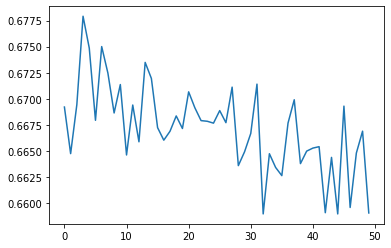

In [ ]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
ls

 dataset/                      Models/
 datasets/                    'Training VGG16 V1'/
'Evaluate and plot model'/     train_model.ipynb
 history_train_deeprank_v1/    train_model_rgb_face.ipynb
 history_training/             train_model_rgb_face_v2.ipynb
 keras-facenet@                train_model_rgb_face_v3.ipynb
 meta.tsv                      vecs.tsv
 model_architecture_v2.ipynb   vggface.ipynb


In [ ]:
cd dataset/

/content/drive/My Drive/PythonProject/Triplet Loss Model/dataset


In [ ]:
ls

binh/  crop_face/  ly/  nhat/  quang/  xeo/


In [ ]:
cd quang/

/content/drive/My Drive/PythonProject/Triplet Loss Model/dataset/quang


In [ ]:
ls

model_plot.png  quang_1.jpg  quang_2.jpg  quang_3.jpg


In [ ]:
image = cv2.imread("quang_1.jpg")
# image = cv2.cvtColor(image, cv2.COLOR_BAYER_BG2RGB)
image = cv2.resize(image, (180, 180))
image = np.expand_dims(image, axis = 0)
print(model.predict(image))

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.25035673 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.4516898  0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.06020184 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

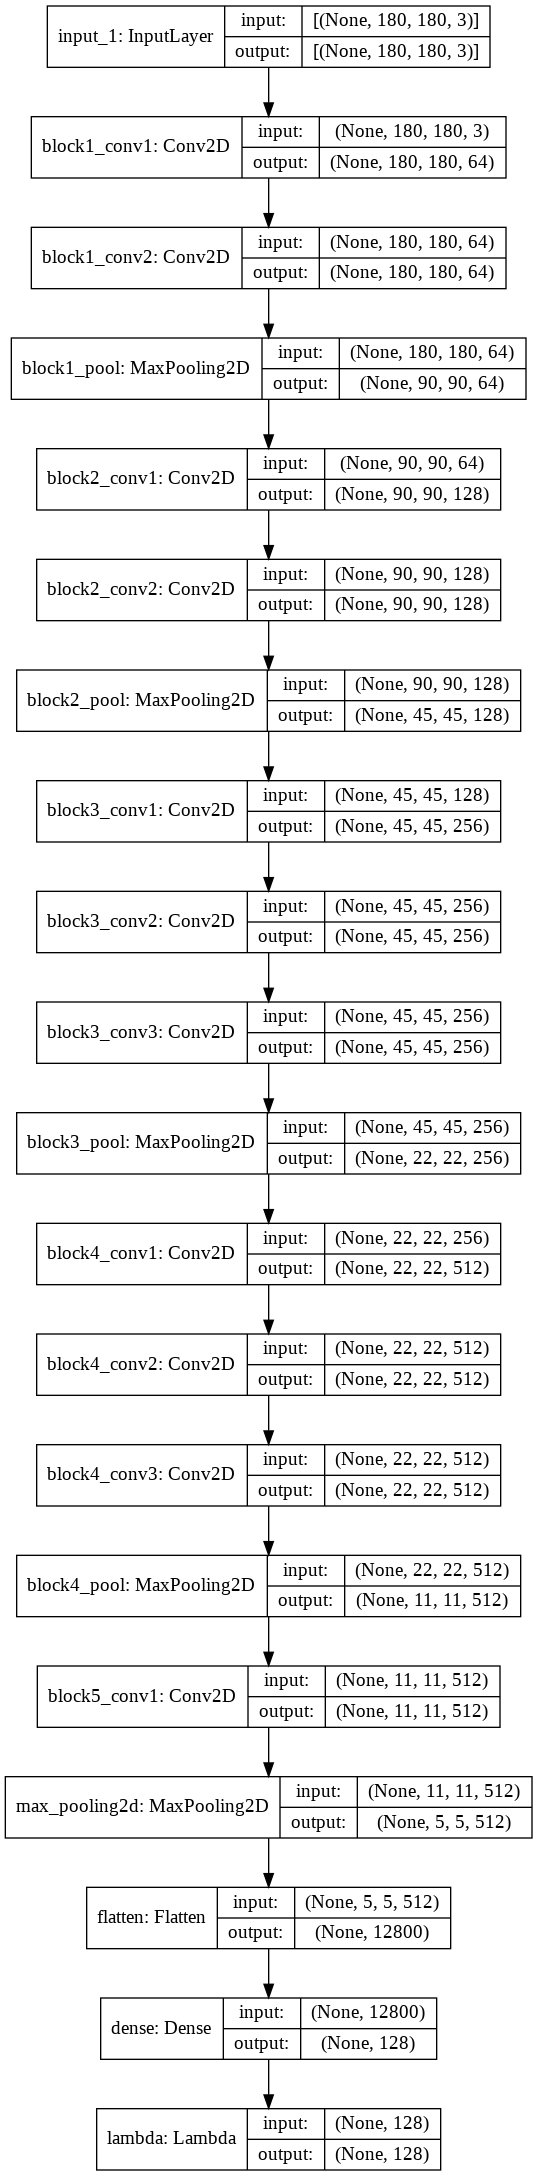

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)